In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/val'
test_path = '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test'

classes = [
    'Healthy',
    'Melanocytic nevus',
    'Melanoma',
]

img_width = 224
img_height = 224
num_classes = 3 #if 3 class change to 3, otherwise
class_mode = 'categorical'
batch_size = 32

Found 3000 images belonging to 3 classes.


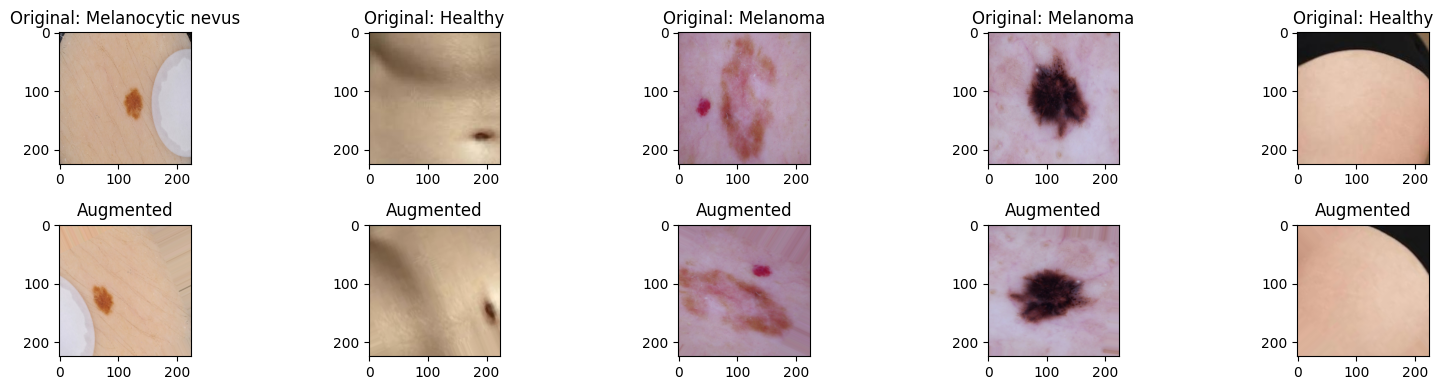

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

display = 5

original_datagen = ImageDataGenerator()

augmentation_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.9, 1.1],
    channel_shift_range=0.1,
    fill_mode='nearest'
)

original_generator = original_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=True
)

original_images, original_labels = next(original_generator)

augmented_images = next(augmentation_datagen.flow(
    original_images,
    batch_size=batch_size,
    shuffle=False
))

plt.figure(figsize=(16, 4))

for i in range(display):

    class_index = np.argmax(original_labels[i])

    ax = plt.subplot(2, display, i + 1)
    plt.imshow(original_images[i].astype('uint8'))
    plt.title(f'Original: {classes[class_index]}')
    plt.axis("on")

    ax = plt.subplot(2, display, display + i + 1)
    plt.imshow(augmented_images[i].astype('uint8'))
    plt.title('Augmented')
    plt.axis("on")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input

train_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.9, 1.1],
    channel_shift_range=0.1,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=class_mode,
)

validation_generator = train_datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=class_mode,
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=False
)

Found 3000 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 224, 224, 3)     │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv1_pad (ZeroPadding2D)   │ (None, 230, 230, 3)     │              0 │ input_layer[0][0]       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv1_conv (Conv2D)         │ (None, 112, 112, 64)    │          9,472 │ conv1_pad[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ pool1_pad (ZeroPadding2D)   │ (None, 114, 114, 64)    │              0 │ conv1_conv[0][0]        │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ pool1_pool (MaxPooling2D)   │ (None, 56, 56, 64)      │              0 │ pool1_pad[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_preact_bn      │ (None, 56, 56, 64)      │            256 │ pool1_pool[0][0]        │
│ (BatchNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_preact_relu    │ (None, 56, 56, 64)      │              0 │ conv2_block1_preact_bn… │
│ (Activation)                │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_1_conv         │ (None, 56, 56, 64)      │          4,096 │ conv2_block1_preact_re… │
│ (Conv2D)                    │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_1_bn           │ (None, 56, 56, 64)      │            256 │ conv2_block1_1_conv[0]… │
│ (BatchNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_1_relu         │ (None, 56, 56, 64)      │              0 │ conv2_block1_1_bn[0][0] │
│ (Activation)                │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_2_pad          │ (None, 58, 58, 64)      │              0 │ conv2_block1_1_relu[0]… │
│ (ZeroPadding2D)             │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_2_conv         │ (None, 56, 56, 64)      │         36,864 │ conv2_block1_2_pad[0][… │
│ (Conv2D)                    │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_2_bn           │ (None, 56, 56, 64)      │            256 │ conv2_block1_2_conv[0]… │
│ (BatchNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ conv2_block1_2_relu         │ (None, 56, 56, 64)      │              0 │ conv2_block1_2_bn[0][0] │
│ (Activation)                │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────

 Total params: 24,115,459 (91.99 MB)

 Trainable params: 545,923 (2.08 MB)

 Non-trainable params: 23,569,536 (89.91 MB)

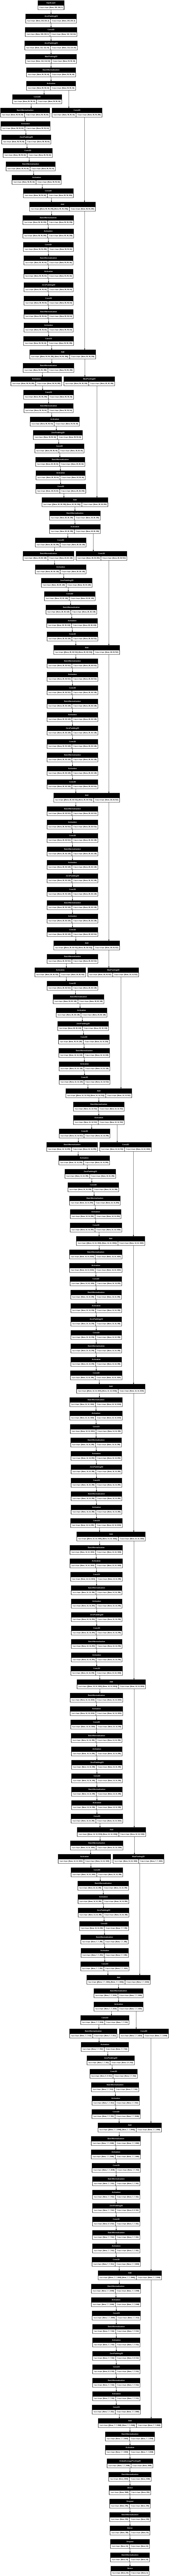

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)

x = BatchNormalization()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model=Model(inputs=base_model.input, outputs=outputs)

model.summary(line_length=100)

tf.keras.utils.plot_model(model, 'model_summary.png', show_shapes=True, dpi=50)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    mode='min',
    restore_best_weights=True,
    verbose=1
)

#tb_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/')

In [ ]:
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    class_weight=class_weights
    #tb_callback
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 767s 8s/step - categorical_accuracy: 0.7145 - loss: 0.6277 - val_categorical_accuracy: 0.7833 - val_loss: 0.4075
Epoch 2/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 635s 7s/step - categorical_accuracy: 0.8168 - loss: 0.3930 - val_categorical_accuracy: 0.8267 - val_loss: 0.3490
Epoch 3/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 642s 7s/step - categorical_accuracy: 0.8402 - loss: 0.3415 - val_categorical_accuracy: 0.8767 - val_loss: 0.3108
Epoch 4/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 665s 7s/step - categorical_accuracy: 0.8499 - loss: 0.3251 - val_categorical_accuracy: 0.8400 - val_loss: 0.3252
Epoch 5/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 610s 6s/step - categorical_accuracy: 0.8539 - loss: 0.3209 - val_categorical_accuracy: 0.8367 - val_loss: 0.3133
Epoch 6/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 609s 6s/step - categorical_accuracy: 0.8710 - loss: 0.2985 - val_categorical_accuracy: 0.8633 - val_loss: 0.3285
Epoch 7/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 609s 6s/step - categorical_accuracy: 0.8688 - loss: 0.29

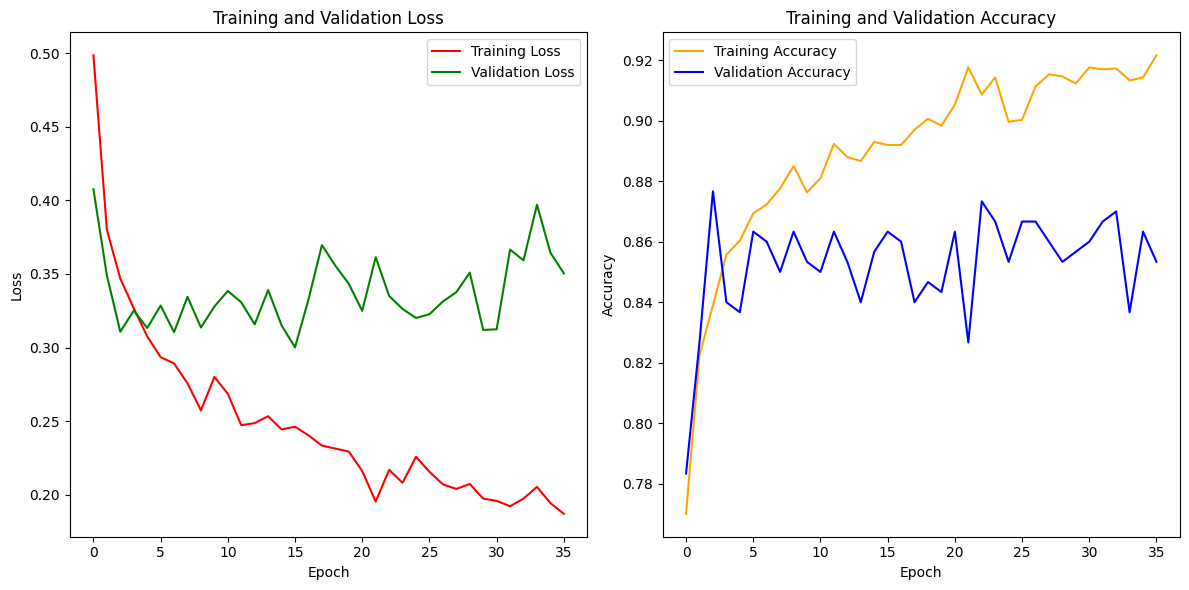

In [ ]:
import pandas

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'red', label='Training Loss')
plt.plot(history.history['val_loss'], 'green', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['categorical_accuracy'], 'orange', label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

plt.savefig('/content/training_plots.png')
history_df = pandas.DataFrame(history.history)
history_csv = '/content/history.csv'
history_df.to_csv(history_csv)

#%load_ext tensorboard
#%tensorboard --logdir logs/

In [ ]:
y_pred_probs = model.predict(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step


Classification Report:
                   precision    recall  f1-score   support

         Healthy       1.00      1.00      1.00       100
Melanocytic nevi       0.76      0.83      0.79       100
        Melanoma       0.81      0.74      0.77       100

        accuracy                           0.86       300
       macro avg       0.86      0.86      0.86       300
    weighted avg       0.86      0.86      0.86       300



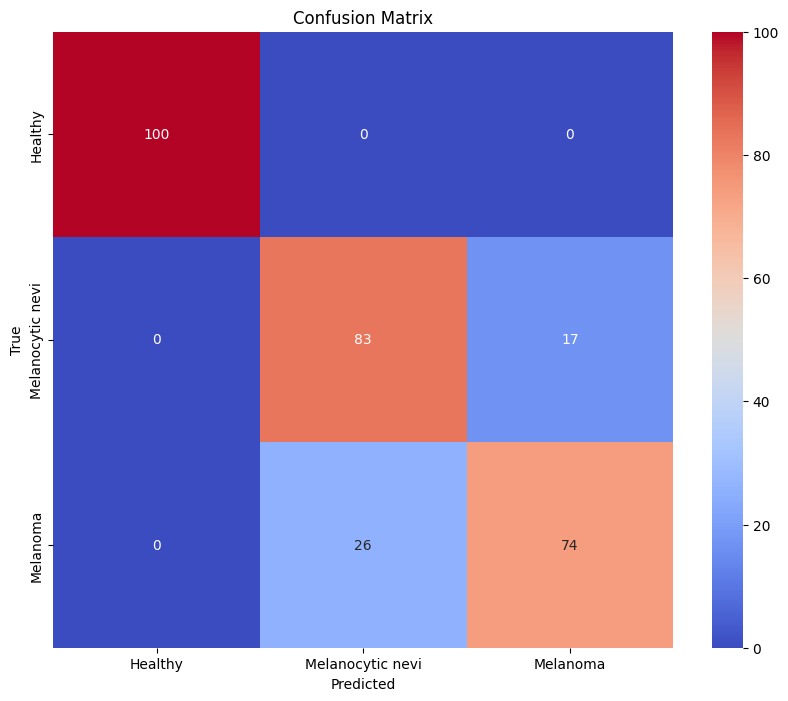

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_true = test_generator.classes
y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print('Classification Report:\n', report)

report_file = 'classification_report.txt'
with open(report_file, 'w') as file:
    file.write(report)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
heatmap_file = 'confusion_matrix.png'
plt.savefig(heatmap_file)

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Healthy/HEALTHY_01_01_4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


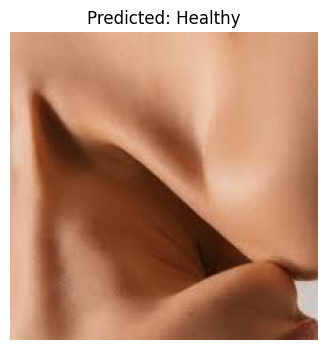

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Healthy/HEALTHY_03_01_12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


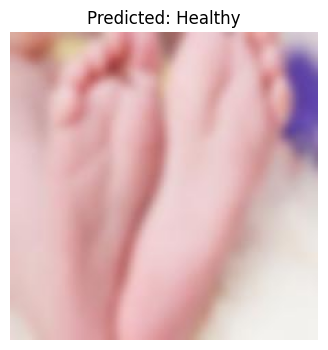

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Healthy/HEALTHY_06_01_6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


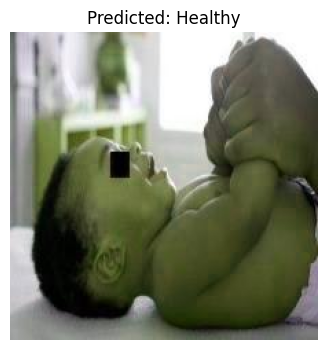

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanocytic nevi/ISIC_0000001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


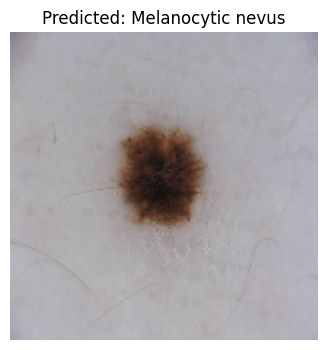

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanocytic nevi/ISIC_0000067.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


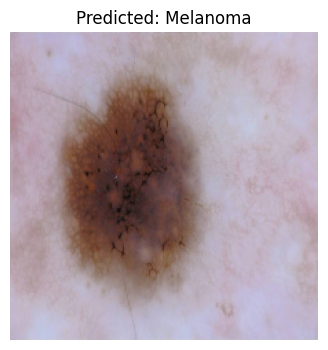

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanocytic nevi/ISIC_0000093_downsampled.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


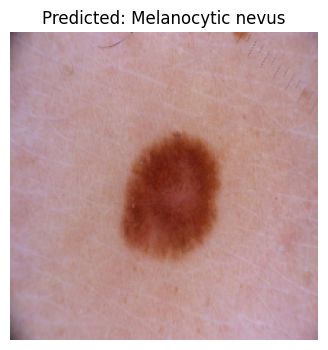

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanoma/ISIC_0000035_downsampled.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


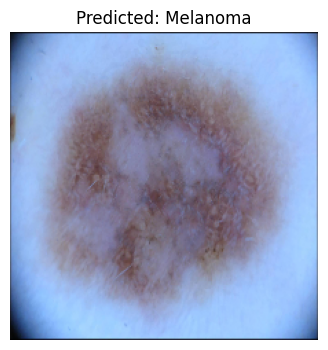

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanoma/ISIC_0000310.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


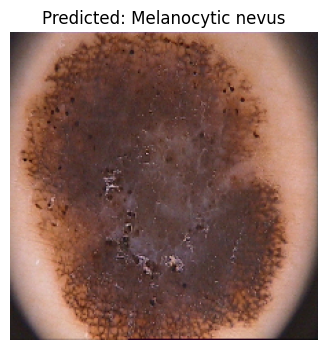

Image Path: /content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanoma/ISIC_0001106_downsampled.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


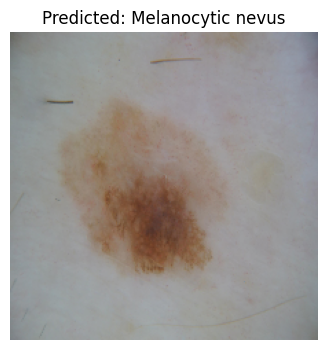

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Healthy/HEALTHY_01_01_4.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Healthy/HEALTHY_03_01_12.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Healthy/HEALTHY_06_01_6.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanocytic nevi/ISIC_0000001.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanocytic nevi/ISIC_0000067.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanocytic nevi/ISIC_0000093_downsampled.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanoma/ISIC_0000035_downsampled.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanoma/ISIC_0000310.jpg',
    '/content/drive/MyDrive/Colab Notebooks/MelanomaFamily-3class/test/Melanoma/ISIC_0001106_downsampled.jpg'
]

for image_path in image_paths:

    print('Image Path:',image_path)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_width, img_height))

    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    preds = model.predict(img_array)
    predicted_class_index = np.argmax(preds[0])

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')

    predicted_class = classes[predicted_class_index]

    plt.title(f'Predicted: {predicted_class}')
    plt.show()

In [17]:
model.save('skin_lesion_model.keras')

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
